In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
palette = sns.color_palette("RdBu_r", 7)

In [3]:
gi = pd.read_excel('giraffe.xlsx')

In [4]:
gi_orig_size = len(gi.index)
print(f'giraffe data has {gi_orig_size} rows')

giraffe data has 1582 rows


In [5]:
# drop irrelevant cols
gi = gi.drop(['IMAGE ID', 'INDIVIDUAL', 'CAMERA', 
             'CAMERA TEMPERATURE','MOONPHASE',
              'Direction (numerical)'], axis=1)

In [6]:
gi.Passage.unique()

array([0, 1, '*', 713, nan], dtype=object)

In [7]:
# drop missing data and outlier
gi = gi[(gi.Passage != '*') & (gi.Passage != 713)]
gi = gi[gi.Passage.isnull() == False]

In [8]:
print('{:.2f}% of data remaining after filter on Passage'
      .format(len(gi.index) / gi_orig_size))

0.90% of data remaining after filter on Passage


In [9]:
gi.Passage.unique()

array([0, 1], dtype=object)

In [10]:
gi_c = gi.copy()

In [11]:
# convert to numeric
gi['Passage'] = gi['Passage'].astype(int)

In [12]:
gi.Passage.dtype

dtype('int64')

In [13]:
gi.DIRECTION.unique()

array([nan, 'IN', 'OUT', 'ALONG', 'UNKNOWN'], dtype=object)

In [14]:
# drop where DIRECTION = "Along"
gi = gi[gi.DIRECTION != 'ALONG']
print('{:.2f}% of data remaining after filter on DIRECTION != ALONG'
      .format(len(gi.index) / gi_orig_size))

0.81% of data remaining after filter on DIRECTION != ALONG


In [15]:
month_mean = gi.groupby('DATE.1').mean()['Passage'].reset_index()

In [16]:
a = ['januari','februari','mars',
     'april','maj','juni','juli',
     'augusti','september','oktober',
     'november','december']

In [17]:
date_map = {month: i for i, month in enumerate(a)}

In [18]:
date_map = {month: i for i, month in enumerate(a)}

In [19]:
date_map

{'januari': 0,
 'februari': 1,
 'mars': 2,
 'april': 3,
 'maj': 4,
 'juni': 5,
 'juli': 6,
 'augusti': 7,
 'september': 8,
 'oktober': 9,
 'november': 10,
 'december': 11}

In [20]:
def add_month_digits(x):
    x['i'] = 0
    for month, i in date_map.items():
        x.loc[x['DATE.1'] == month, 'i'] = i
    return x

In [21]:
month_names = ['January','February','March',
               'April','May','June','July',
               'August','September','October',
               'November','December']

In [22]:
gi_i = add_month_digits(gi)

/home/max/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


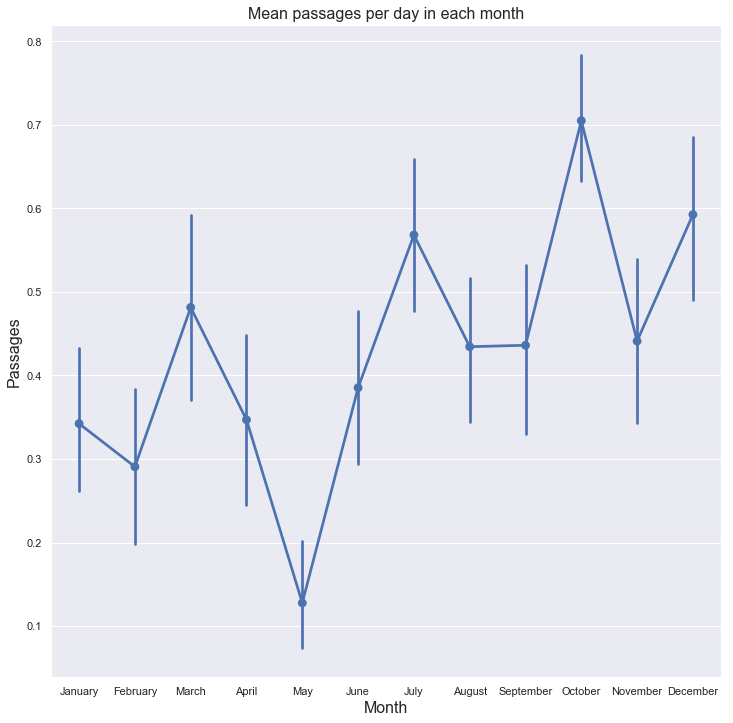

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='i', y='Passage', data=gi_i, ci=95)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

## eller som barplot..

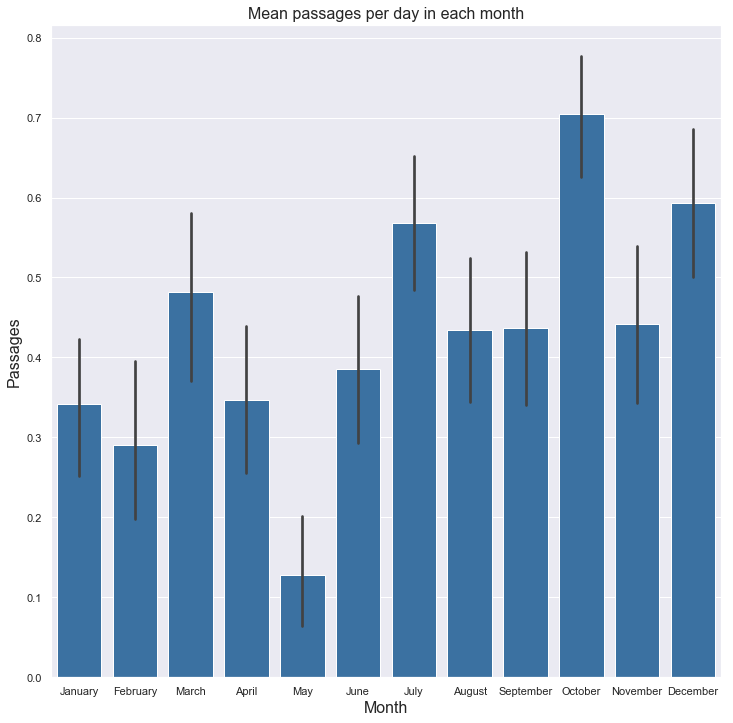

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='i', y='Passage', data=gi_i, ci=95, palette=[palette[0]])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

## eller med fina färger?

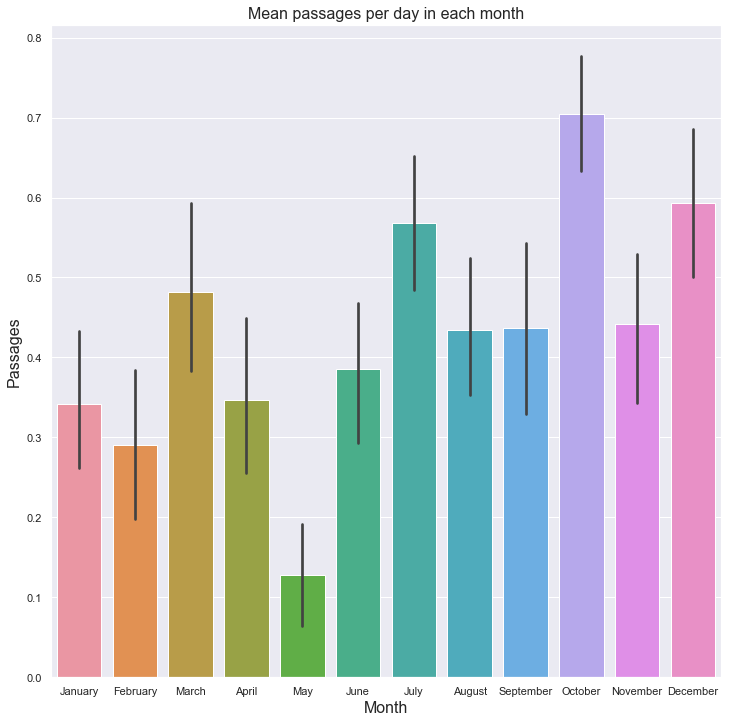

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='i', y='Passage', data=gi_i, ci=95)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

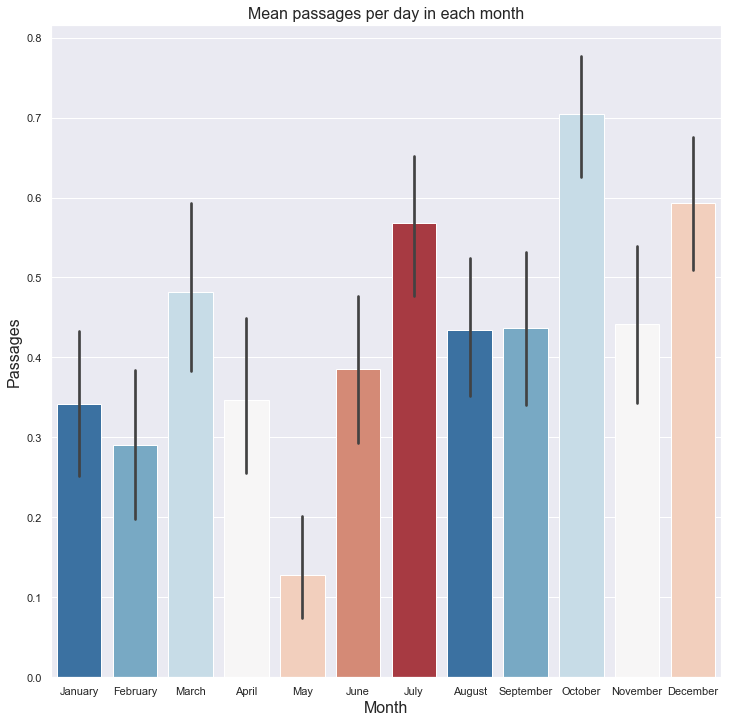

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='i', y='Passage', data=gi_i, ci=95, palette=palette)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

In [27]:
# drop missing HOUR values
gi = gi[gi.HOUR.isnull() == False]
print('{:.2f}% of data remaining after filter on HOUR'
      .format(len(gi.index) / gi_orig_size))

0.36% of data remaining after filter on HOUR


Det fanns mycket saknade HOUR värden..

Alla gånger passage är 1 finns det en tid, men det finns inte en enda passage = 0 som faktiskt har en tid. Dvs det finns inga passage = 0 på något giltigt klockslag. se nedan

In [28]:
# bara en giltig passage som saknar tid
gi[(gi.Passage == 1) & (gi.HOUR.isnull())]

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2,i


In [29]:
# ger en tom frame
gi[(gi.Passage == 0) & (gi.HOUR.isnull() == False)]

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2,i


In [30]:
print('antal Passage=0 och HOUR=NaN är {} rows'.format(
    len(gi[(gi.Passage == 0) & (gi.HOUR.isnull() == True)].index)))

antal Passage=0 och HOUR=NaN är 0 rows


### Vilken tid på dygnet använder girafferna korridoren? Passage vs hour

In [31]:
# set hour to int
gi['HOUR'] = gi['HOUR'].astype(int)

/home/max/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
hour_group = gi.groupby('HOUR').sum()['Passage'].reset_index()

In [33]:
errs = gi.groupby('HOUR').std()['Passage']

In [34]:
len(gi[gi.Passage == 0].index)

0

Text(0.5, 1.0, 'Passages in either direction by hour')

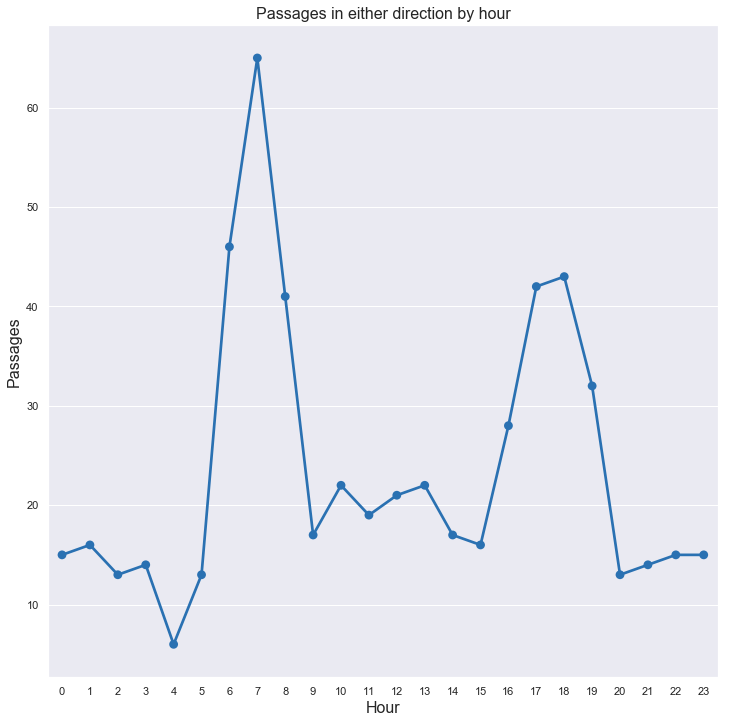

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by hour', fontsize=16)

### Hur många passager görs respektive månad? Passage vs månad

In [36]:
month_group = gi.groupby('DATE.1').sum()['Passage'].reset_index()

In [37]:
month_group = add_month_digits(month_group)

In [38]:
month_group = month_group.sort_values(by='i')

In [39]:
month_group

,DATE.1,Passage,i
4,januari,38,0
3,februari,25,1
8,mars,39,2
0,april,34,3
7,maj,12,4
6,juni,42,5
5,juli,75,6
1,augusti,53,7
11,september,41,8
10,oktober,98,9


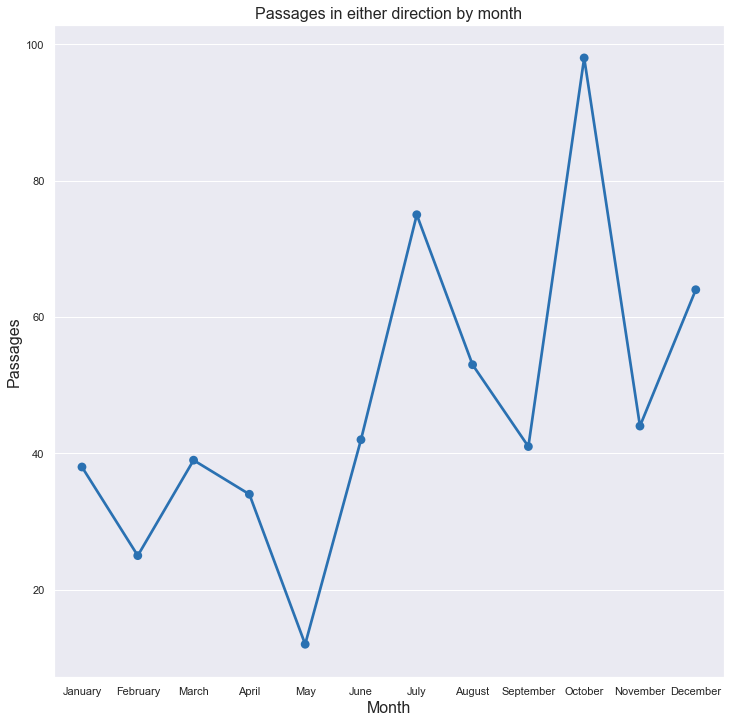

In [40]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by month', fontsize=16)
_=ax.set_xticklabels(month_names)

### Vilken tid på dygnet går de in? In/direction vs hour

In [41]:
in_group = gi[gi.DIRECTION == 'IN'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going in by hour')

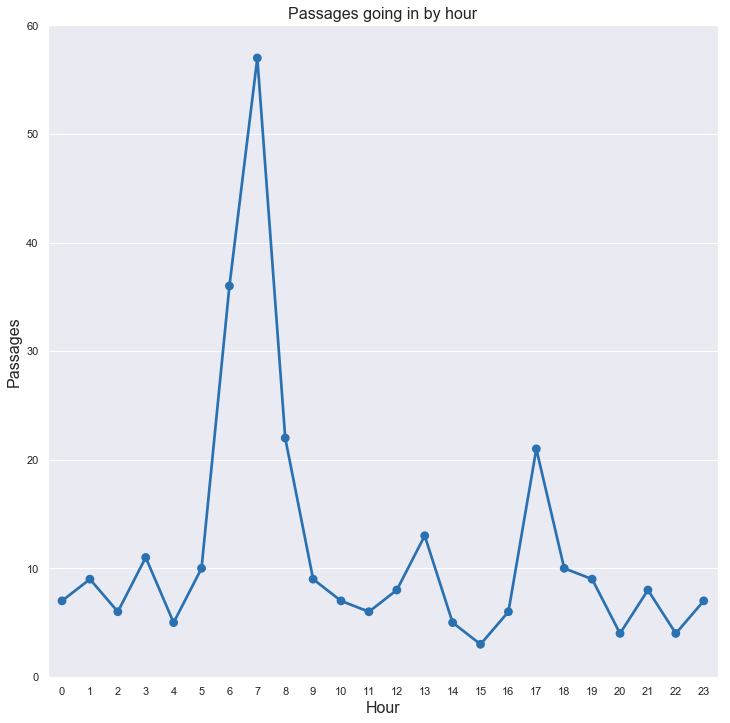

In [42]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going in by hour', fontsize=16)

### Vilken tid på dygnet går de in? In/direction vs hour

In [43]:
out_group = gi[gi.DIRECTION == 'OUT'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going out by hour')

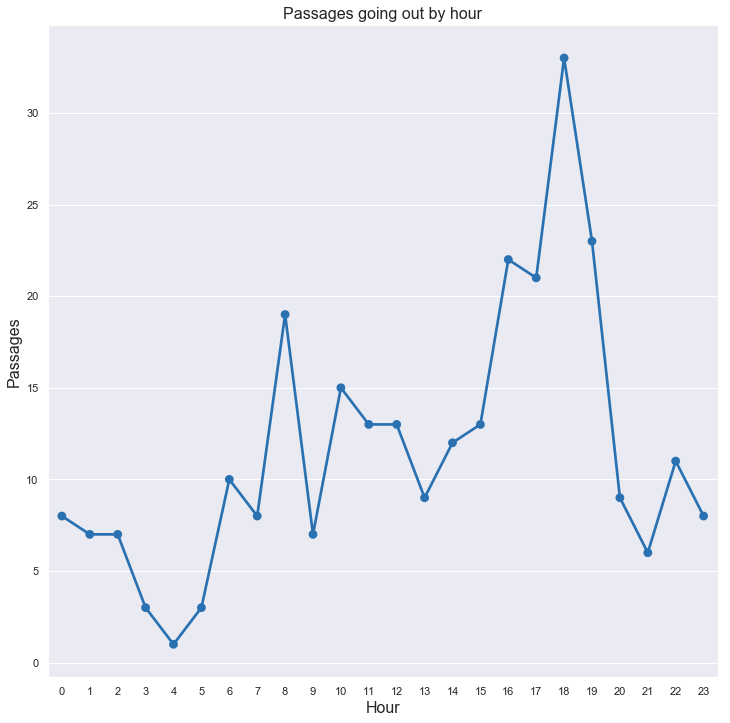

In [44]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0], ci='sd')
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going out by hour', fontsize=16)

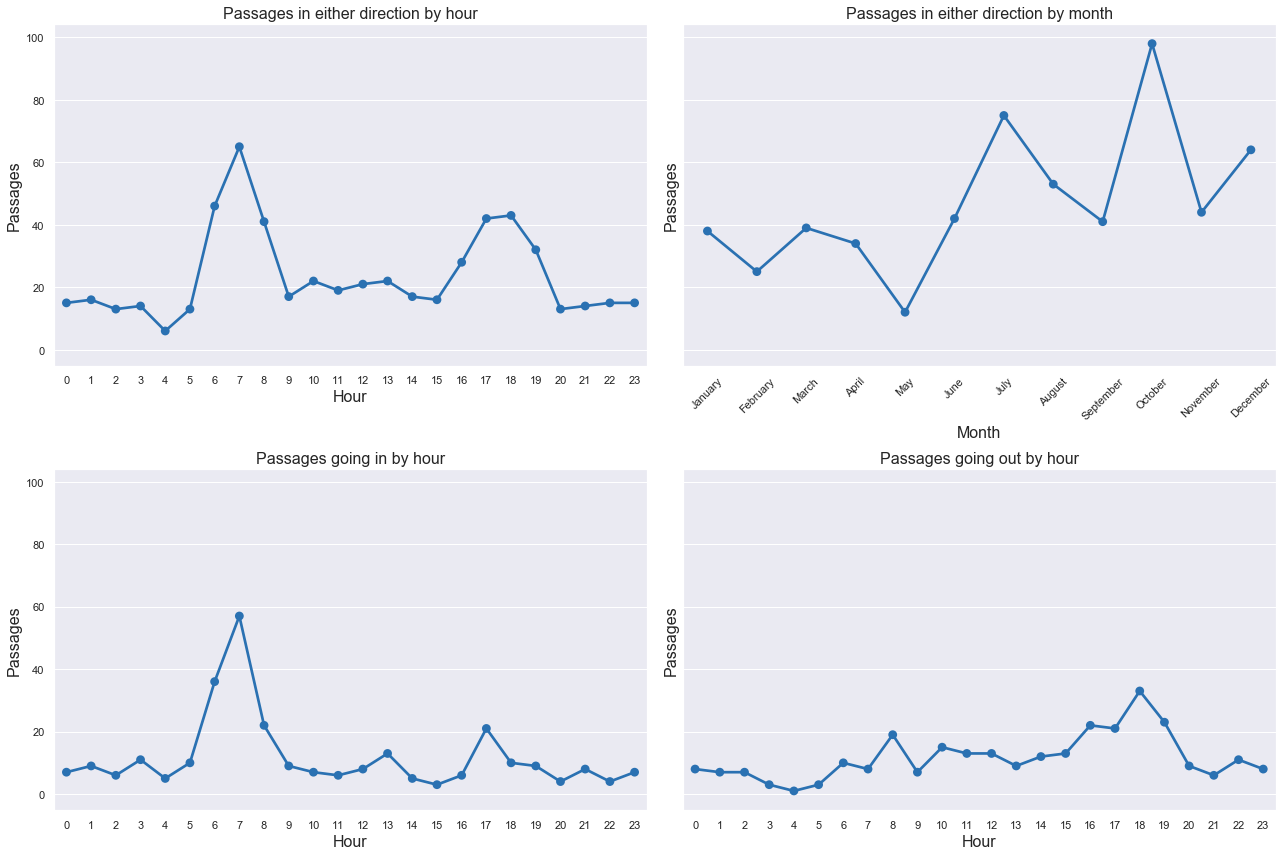

In [45]:
fig, axes = plt.subplots(2,2, figsize=(18,12), sharey=True)
axes = axes.flatten()

sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0], ax=axes[0])
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages in either direction by hour', fontsize=16)

sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0], ax=axes[1])
axes[1].set_xlabel('Month', fontsize=16)
axes[1].set_ylabel('Passages', fontsize=16)
axes[1].set_title('Passages in either direction by month', fontsize=16)
_=axes[1].set_xticklabels(month_names, rotation=45)

sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0], ax=axes[2])
axes[2].set_xlabel('Hour', fontsize=16)
axes[2].set_ylabel('Passages', fontsize=16)
axes[2].set_title('Passages going in by hour', fontsize=16)

sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0], ci='sd', ax=axes[3])
axes[3].set_xlabel('Hour', fontsize=16)
axes[3].set_ylabel('Passages', fontsize=16)
axes[3].set_title('Passages going out by hour', fontsize=16)

plt.tight_layout()

### Det kanske går att göra en graf med tre variabler både för in, ut och timme?

In [46]:
import matplotlib.patches as mpatches

In [47]:
direction_group = gi[(gi.DIRECTION == 'IN') | (gi.DIRECTION == 'OUT')].groupby(['HOUR', 'DIRECTION']).sum()['Passage'].reset_index()

In [48]:
both_group = direction_group.copy()

In [49]:
both_group = both_group.groupby('HOUR').sum()['Passage'].reset_index()

In [50]:
both_group['DIRECTION'] = 'EITHER'

In [51]:
both_group = both_group[['HOUR', 'DIRECTION', 'Passage']]

In [52]:
both_group = direction_group.append(both_group)

In [53]:
both_group['DIRECTION'] = both_group['DIRECTION'].str.title()

Text(0.5, 1.0, 'Passages by hour')

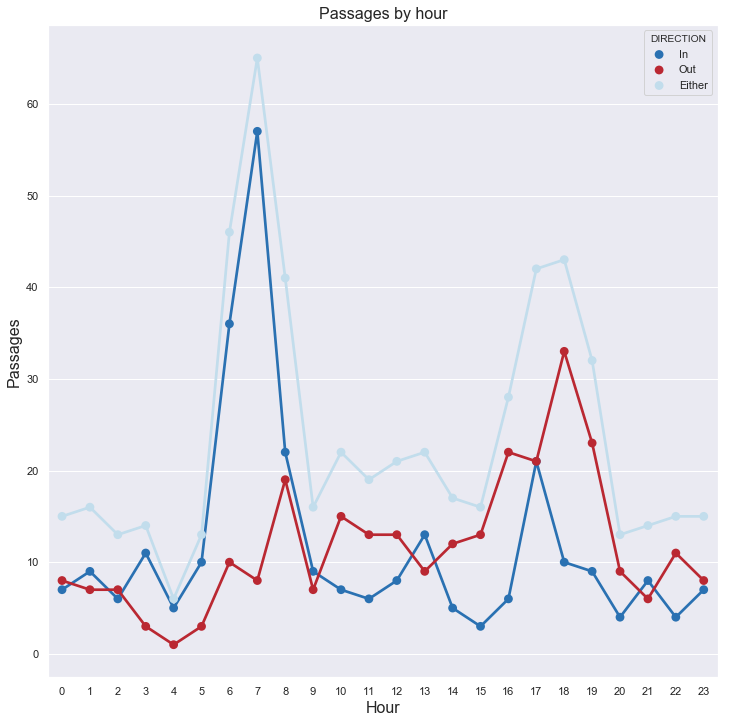

In [54]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=both_group, palette=[palette[0], palette[-1], palette[2]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

In [55]:
direction_group.head()

,HOUR,DIRECTION,Passage
0,0,IN,7
1,0,OUT,8
2,1,IN,9
3,1,OUT,7
4,2,IN,6


In [56]:
# drop SEX missing values
gi = gi[gi['SEX'].isnull() == False]

In [57]:
sex_group = gi.groupby(['HOUR', 'SEX']).sum()['Passage'].reset_index()

In [58]:
sex_all = sex_group.copy()
sex_all = sex_all.groupby('HOUR').sum()['Passage'].reset_index()
sex_all['SEX'] = 'ALL'
sex_all = sex_all[['HOUR', 'SEX', 'Passage']]
sex_all = sex_all.append(sex_group)

In [59]:
sex_all.head()

,HOUR,SEX,Passage
0,0,ALL,15
1,1,ALL,16
2,2,ALL,13
3,3,ALL,14
4,4,ALL,6


In [60]:
sex_all.loc[sex_all.SEX == 'U', 'SEX'] = 'Unknown'
sex_all.loc[sex_all.SEX == 'M', 'SEX'] = 'Male'
sex_all.loc[sex_all.SEX == 'F', 'SEX'] = 'Female'
sex_all.loc[sex_all.SEX == 'ALL', 'SEX'] = 'All'

Text(0.5, 1.0, 'Passages by hour')

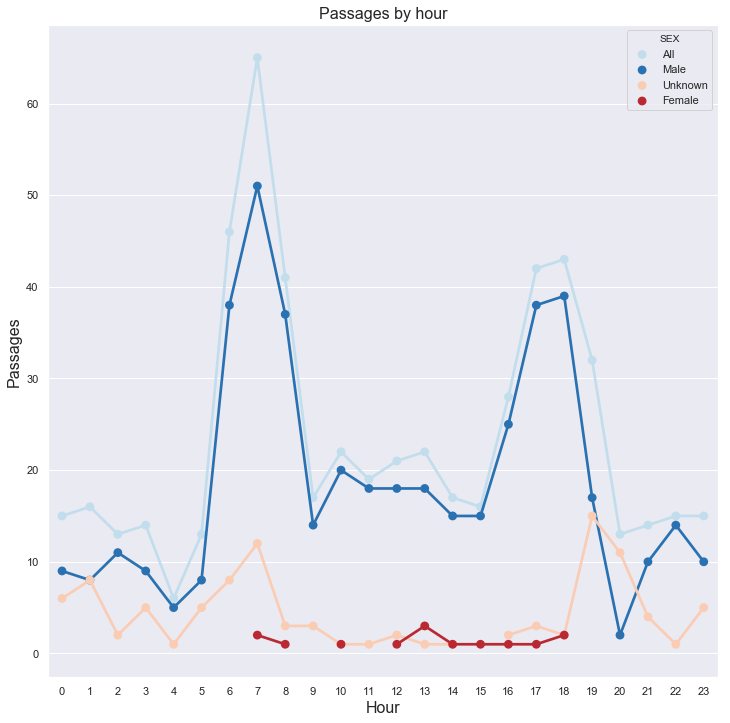

In [61]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_all, palette=[palette[2], palette[0], 
                                     palette[4], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

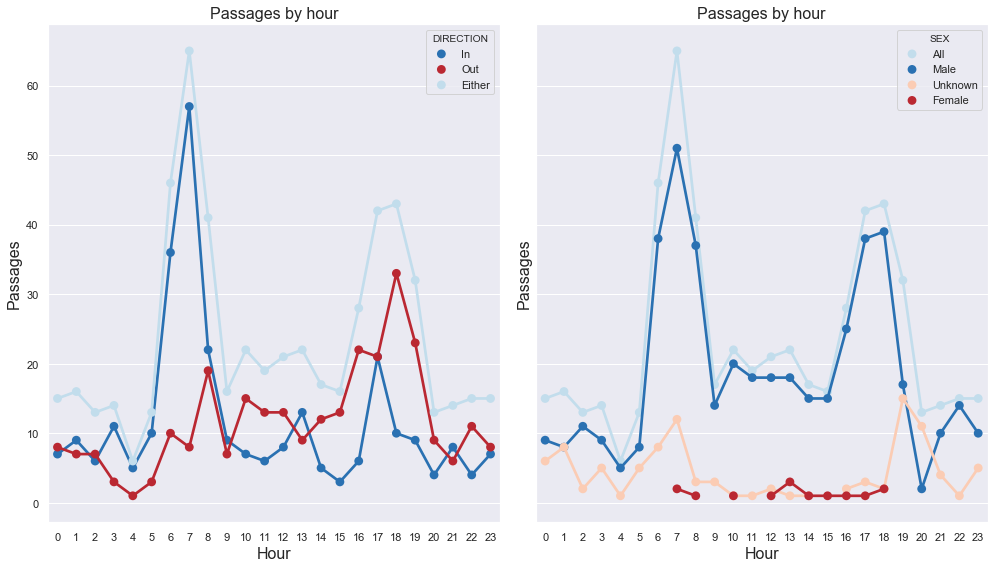

In [62]:
fig, axes = plt.subplots(1,2,figsize=(14,8), sharey=True)
axes = axes.flatten()
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=both_group, palette=[palette[0], palette[-1], palette[2]],
              ax = axes[0])
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages by hour', fontsize=16)

sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_all, palette=[palette[2], palette[0], 
                                     palette[4], palette[-1]],
              ax = axes[1])
axes[1].set_xlabel('Hour', fontsize=16)
axes[1].set_ylabel('Passages', fontsize=16)
axes[1].set_title('Passages by hour', fontsize=16)

plt.tight_layout()

### Hur många djur använder korridoren samtidigt? Passage vs group size

In [63]:
gi['GROUP SIZE'] = gi['GROUP SIZE'].astype(int)

In [64]:
group_size = gi.groupby(['GROUP SIZE', 'SEX']).sum()['Passage'].reset_index()

In [65]:
group_size.head()

,GROUP SIZE,SEX,Passage
0,1,F,5
1,1,M,322
2,1,U,75
3,2,F,6
4,2,M,73


In [66]:
group_size['GROUP SIZE'] = group_size['GROUP SIZE'].astype(int)

In [67]:
group_size.loc[group_size.SEX == 'U', 'SEX'] = 'Unknown'
group_size.loc[group_size.SEX == 'M', 'SEX'] = 'Male'
group_size.loc[group_size.SEX == 'F', 'SEX'] = 'Female'

In [68]:
male_group_size = gi[(gi['SEX'] == 'M') & (gi['GROUP SIZE'] <= 3)]\
.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [69]:
male_group_size

,GROUP SIZE,Passage
0,1,322
1,2,73
2,3,26


In [70]:
print('total male passages with group size <= 3: {}'.format(male_group_size['Passage'].sum()))

total male passages with group size <= 3: 421


Båda på samma plot:

Text(0.5, 1.0, 'Passages in different group sizes')

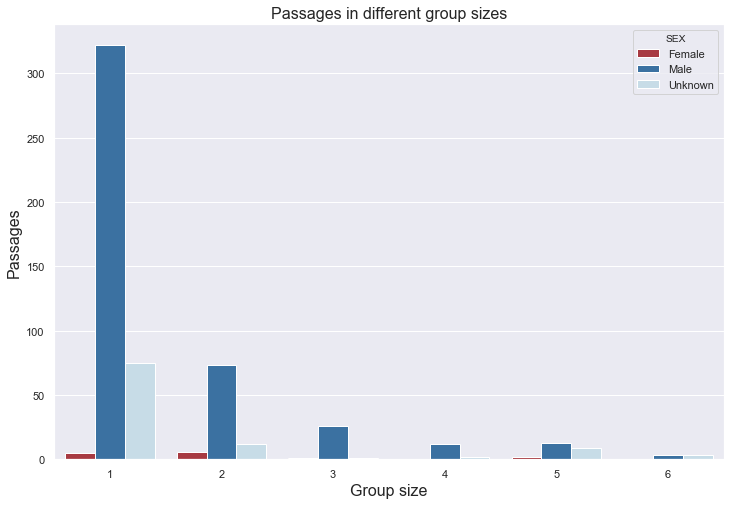

In [71]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.barplot(x='GROUP SIZE', y='Passage', hue='SEX',
            data=group_size, ax=ax, palette=[palette[-1], palette[0],palette[2]])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

Text(0.5, 1.0, 'Passages in different group sizes')

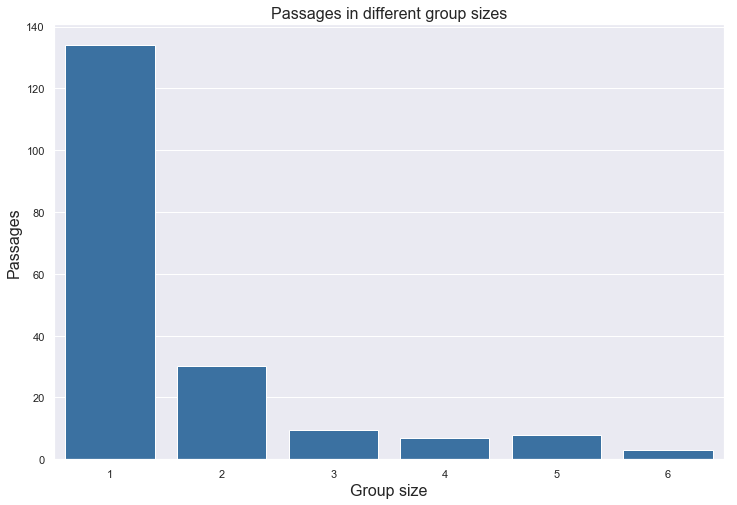

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=ax, color=palette[0], ci=None)
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

### Hur många passager utgörs av ensamma handjur eller hanar i grupper om 3 eller färre? Dvs group size ≤3 där alla individer är hanar ”sex=M”, alternativt sex=U men det blir kanske för osäkert.

Text(0.5, 1.0, 'Passages by males in groups sizes <= 3')

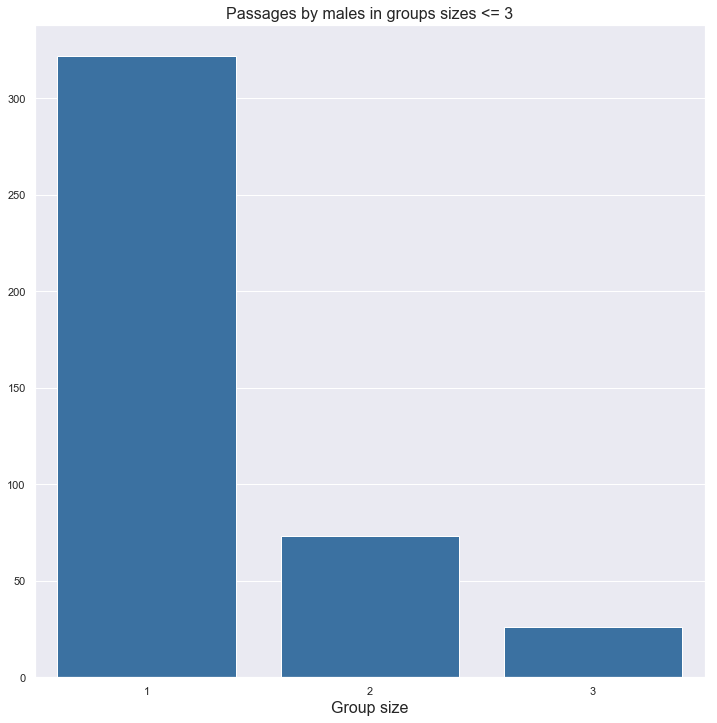

In [73]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=male_group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('')
ax.set_title('Passages by males in groups sizes <= 3', fontsize=16)

### Heatmap of hour+month vs passage

In [74]:
hour_month = gi.groupby(['DATE.1', 'HOUR'], sort=False).sum()['Passage'].reset_index()

In [75]:
hour_month = add_month_digits(hour_month)

In [76]:
hour_month = hour_month.sort_values(by=['i','HOUR'])

In [77]:
hour_month.head()

,DATE.1,HOUR,Passage,i
119,januari,0,2,0
20,januari,1,3,0
176,januari,2,1,0
19,januari,3,2,0
120,januari,4,2,0


In [78]:
hour_month = hour_month[['i', 'HOUR', 'Passage']]

In [79]:
hour_month = hour_month.rename(index=str, 
                               columns={"i": "Month", 
                                        "HOUR": "Hour"})

In [80]:
pivoted = hour_month.pivot('Hour', 'Month', 'Passage')

In [81]:
pivoted.fillna(0, inplace=True)

In [82]:
piv2 = pivoted.sort_values(by='Hour', ascending=False)

## I heatmap ser man trenderna

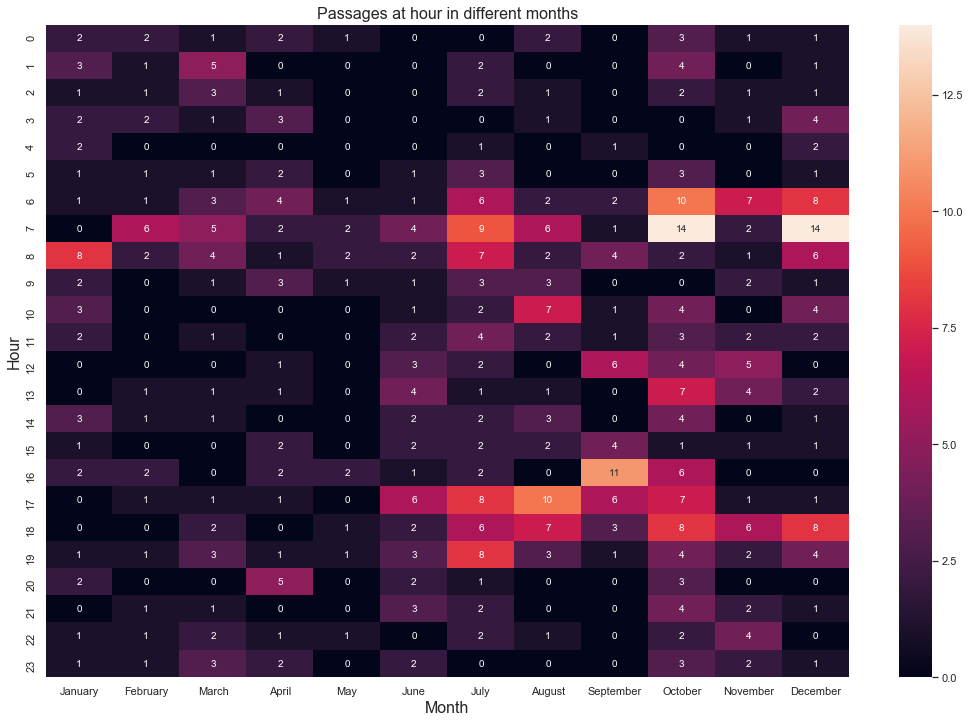

In [83]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(pivoted, ax=ax, annot=True)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Hour', fontsize=16)
ax.set_title('Passages at hour in different months', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

## Hour reversed

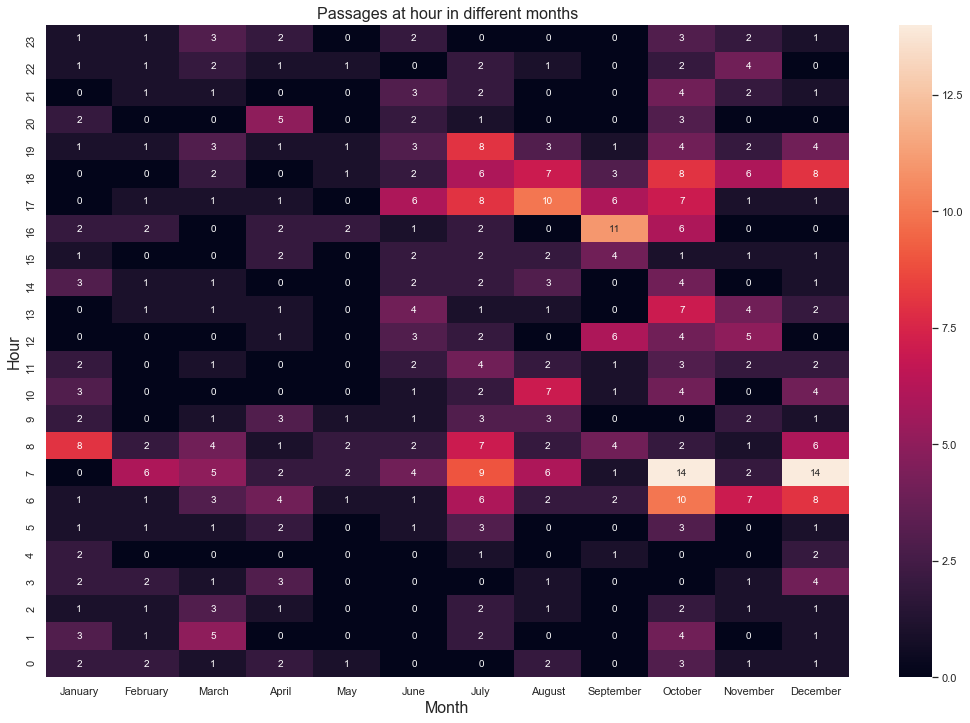

In [84]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(piv2, ax=ax, annot=True)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Hour', fontsize=16)
ax.set_title('Passages at hour in different months', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

In [85]:
!pip install joypy

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Verkar som dessa joyplots blir lite utdragna, de har extra smoothing eller nåt.. de blir lite missvisande om man jämför med vanliga distributionsplots för samma månad/timme, se nedan 

In [86]:
import joypy

In [87]:
hour_month.head()

,Month,Hour,Passage
119,0,0,2
20,0,1,3
176,0,2,1
19,0,3,2
120,0,4,2


In [88]:
month_names

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [89]:
hour_month = hour_month.rename(index=str, columns={'Month': 'month_id'})

In [90]:
def add_month_names(x):
    x['Month'] = ''
    for i, month in enumerate(month_names):
        x.loc[x['month_id'] == i, 'Month'] = month
    return x

In [91]:
hour_month = add_month_names(hour_month)

## Jämför december och januari med joyploten

/home/max/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


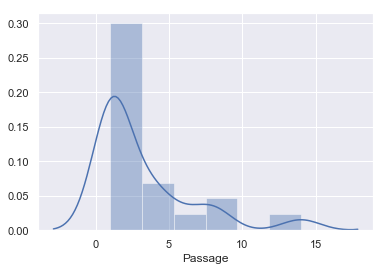

In [92]:
sns.distplot(hour_month[hour_month['Month'] == 'December']['Passage'])

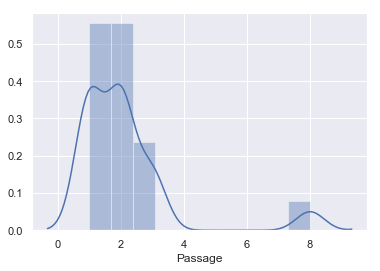

In [93]:
sns.distplot(hour_month[hour_month['Month'] == 'January']['Passage'])

<Figure size 1920x1920 with 0 Axes>

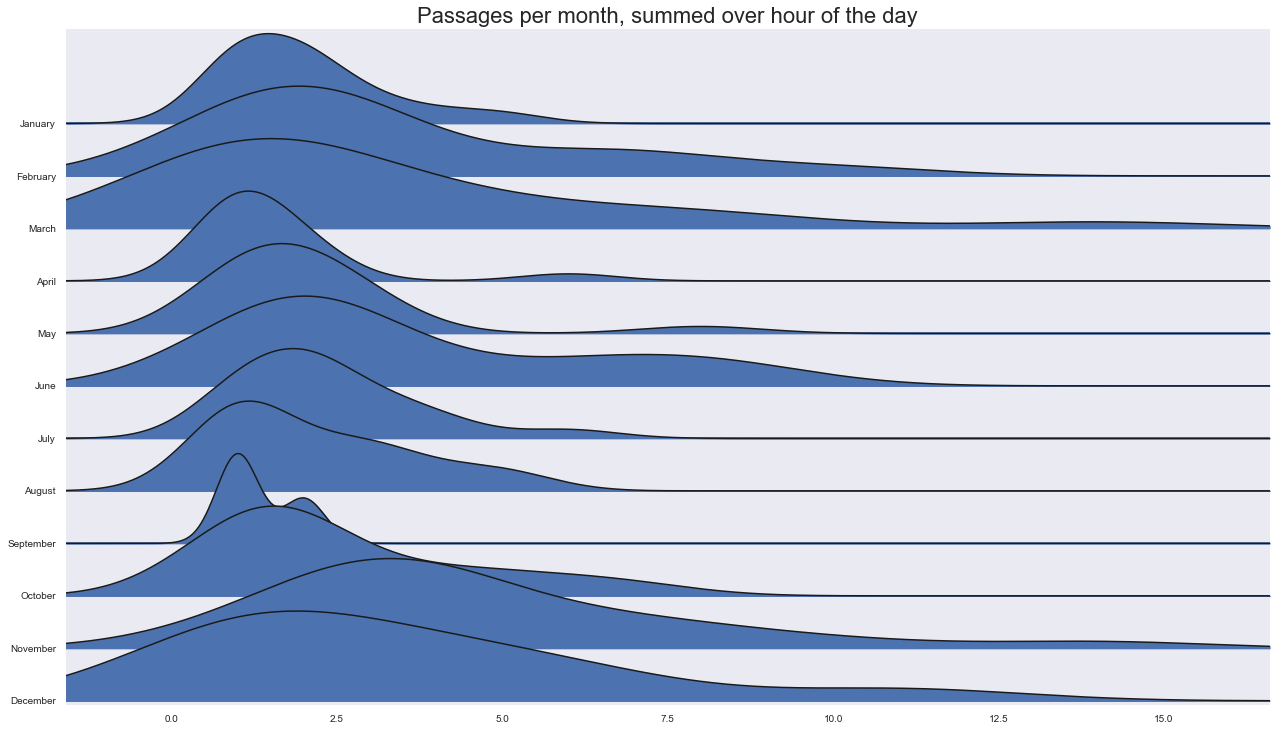

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure(figsize=(24,24), dpi=80)
fig, axes = joypy.joyplot(hour_month, 
                          column='Passage', 
                          by='Month', 
                          ylim='own',
                          figsize=(18,10),
                          labels=month_names)

# Decoration
#[ax.set_yticklabels(m) for ax, m in zip(axes, month_names)]
#axes[-3].set_xlabel('Hour', fontsize=16)
#axes[-1].set_ylabel('Passages', fontsize=16)
plt.title('Passages per month, summed over hour of the day', fontsize=22)
plt.show()
plt.tight_layout()

## Jämför timme 23 och timme 7 distributionerna med joyploten nedan

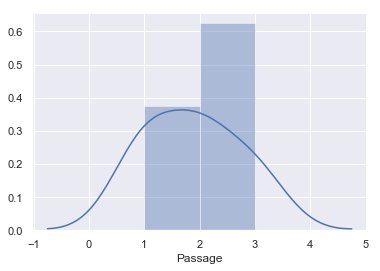

In [95]:
sns.distplot(hour_month[hour_month['Hour'] == 23]['Passage'])

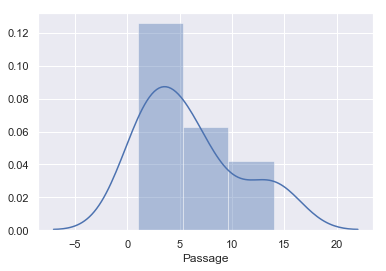

In [96]:
sns.distplot(hour_month[hour_month['Hour'] == 7]['Passage'])

<Figure size 1440x800 with 0 Axes>

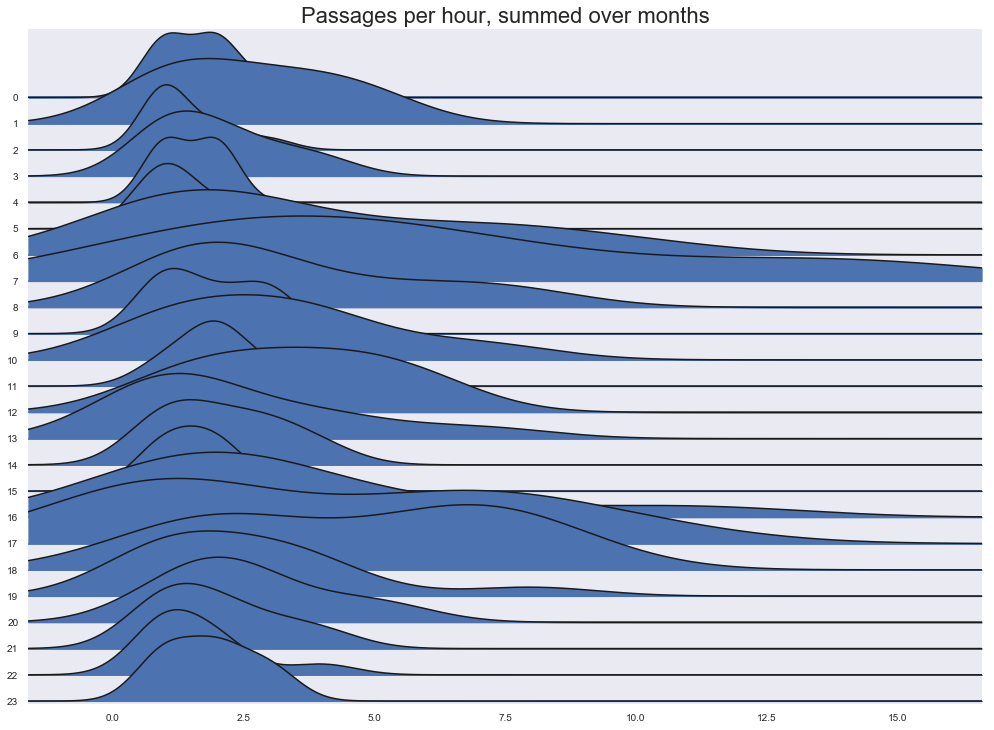

In [97]:
%matplotlib inline
plt.figure(figsize=(18,10), dpi= 80)
fig, axes = joypy.joyplot(hour_month, 
                          column='Passage', 
                          by="Hour", 
                          ylim='own', 
                          figsize=(14,10))

# Decoration
axes[-3].set_xlabel('Hour', fontsize=16)
axes[-1].set_ylabel('Passages', fontsize=16)
plt.title('Passages per hour, summed over months', fontsize=22)
plt.show()

In [98]:
xls = pd.ExcelFile('weather.xlsx')
we = pd.read_excel(xls, 'Daily Weather')

In [99]:
gi.head()

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2,i
2,2015-10-03,oktober,2.0,7,M,IN,1,0,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03,9
3,2015-10-03,oktober,2.0,13,M,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03,9
4,2015-10-03,oktober,2.0,13,U,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03,9
5,2015-10-04,oktober,2.0,8,M,IN,1,0,1,1,1,NaN,0.7,22.0,1020.0,60.0,4.7,50.0,2015-10-04,9
12,2015-10-11,oktober,2.0,20,M,OUT,0,1,1,1,1,NaN,0.0,22.0,1020.0,60.0,4.1,50.0,2015-10-11,9


In [100]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 24,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,18.0,12.0,11.0,10.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,18.0,13.0,11.0,10.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,18.0,14.0,11.0,10.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,18.0,15.0,11.0,10.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,18.0,16.0,12.0,10.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [101]:
we['Rain'] = we['Rain'] / 10
we['Rain7'] = we['Rain7'] / 10
we['Rain30'] = we['Rain30'] / 10
we['Rain90'] = we['Rain90'] / 10

In [102]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 24,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,1.8,1.2,1.1,1.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,1.8,1.3,1.1,1.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,1.8,1.4,1.1,1.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,1.8,1.5,1.1,1.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,1.8,1.6,1.2,1.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [103]:
we = we.rename(index=str, columns={'Date': 'DATE'})

In [104]:
giwe = pd.merge(gi_c, we, how='outer', on='DATE')

In [105]:
giwe.columns

Index(['DATE', 'DATE.1', 'CORRIDOR', 'HOUR', 'SEX', 'DIRECTION', 'IN', 'OUT',
       'GROUP SIZE', 'Passage W/O along', 'Passage', 'COMMENT',
       'MOON LUMINOSITY', 'MEAN TEMP', 'PRESSURE', 'HUMIDITY', 'WIND SPEED',
       'CLOUD COVERAGE', 'DATE.2', 'Rain', 'Rain7', 'Rain30', 'Rain90',
       'Temp ', 'Temp7', 'Temp30', 'Temp90', 'Pressure ~', 'Humidity~',
       'Wind~', 'Cloud coverage~', 'Moon Luminosity~', 'Moon phase', '365Temp',
       '365CC', '365Rain', 'Temp7hi-lo', 'Temp30hi-lo', 'Temp90hi-lo',
       'Rain7hi-lo', 'Rain30hi-lo', 'Rain90hi-lo', 'Unnamed: 24', 'Sum IN',
       'Sum OUT', 'Sum INOUT'],
      dtype='object')

In [106]:
giwe = giwe.rename(index=str, columns={'Temp ': 'Temperature'})

In [107]:
giwe.loc[giwe.SEX == 'U', 'SEX'] = 'Unknown'
giwe.loc[giwe.SEX == 'M', 'SEX'] = 'Male'
giwe.loc[giwe.SEX == 'F', 'SEX'] = 'Female'

In [108]:
tmp = giwe[['DATE', 'Temperature', 'Passage W/O along', 'SEX']]

In [109]:
tmp = tmp.dropna()
tmp.head()

,DATE,Temperature,Passage W/O along,SEX
2,2015-10-03,23.0,1,Male
3,2015-10-03,23.0,1,Male
4,2015-10-03,23.0,1,Unknown
5,2015-10-04,22.0,1,Male
12,2015-10-11,22.0,1,Male


In [110]:
temp_group = tmp.groupby(['Temperature', 'SEX']).sum().reset_index()

In [111]:
temp_group.head()

,Temperature,SEX,Passage W/O along
0,13.0,Male,1
1,16.0,Male,10
2,16.0,Unknown,5
3,17.0,Female,0
4,17.0,Male,21


### Vid vilken dygnsmedeltemperatur görs flest passager? Signifikant? Passage (Kolumn AB) vs temp (kolumn F)

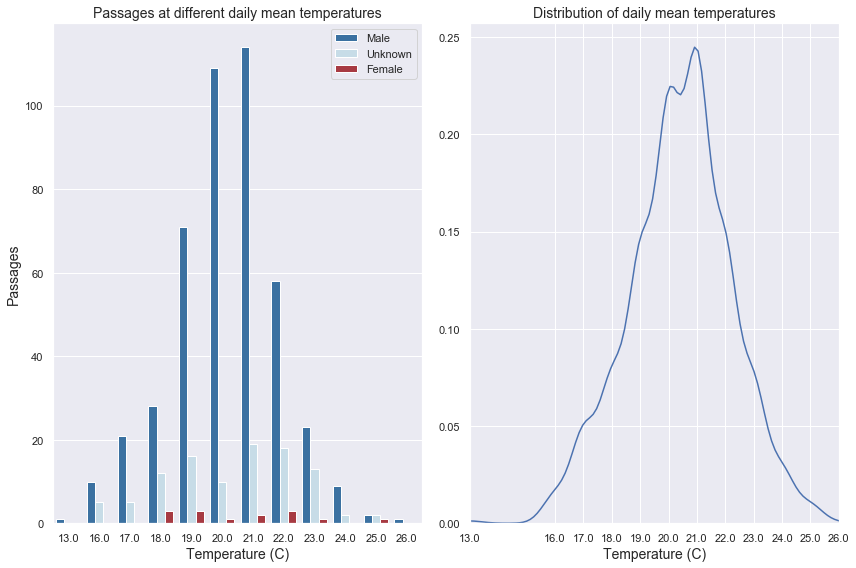

In [112]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.barplot(x='Temperature', y='Passage W/O along', hue='SEX',
            data=temp_group, ax=axes[0], palette=[palette[0], palette[2], palette[-1]])
axes[0].set_xlabel('Temperature (C)', fontsize=14)
axes[0].set_ylabel('Passages', fontsize=14)
axes[0].legend(loc='upper right')
axes[0].set_title('Passages at different daily mean temperatures', fontsize=14)

sns.distplot(giwe['Temperature'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily mean temperatures', fontsize=14)
axes[1].set_xlabel('Temperature (C)', fontsize=14)
axes[1].set_xlim(13, 26)
_=axes[1].set_xticks(temp_group['Temperature'].unique())
_=axes[1].set_xticklabels(temp_group['Temperature'].unique())
plt.tight_layout()

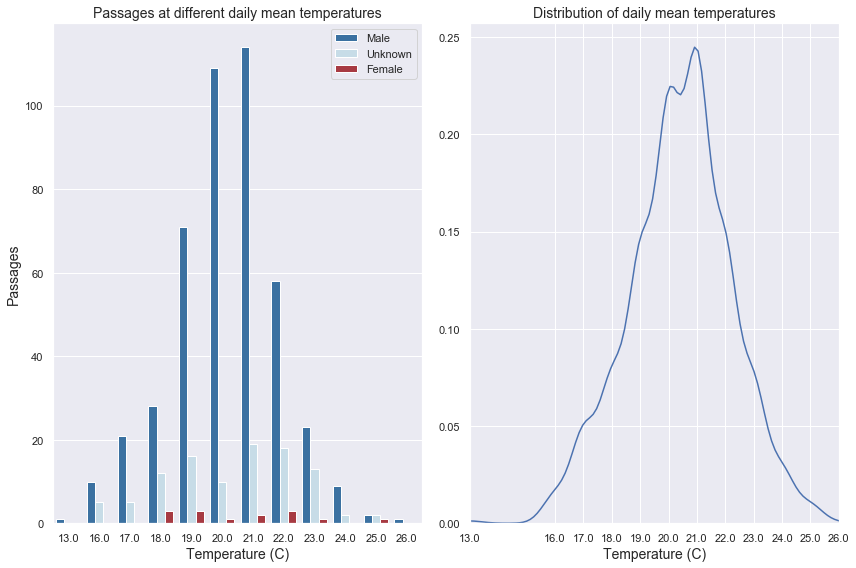

In [113]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.barplot(x='Temperature', y='Passage W/O along', hue='SEX',
            data=temp_group, ax=axes[0], palette=[palette[0], palette[2], palette[-1]])
axes[0].set_xlabel('Temperature (C)', fontsize=14)
axes[0].set_ylabel('Passages', fontsize=14)
axes[0].legend(loc='upper right')
axes[0].set_title('Passages at different daily mean temperatures', fontsize=14)

sns.distplot(giwe['Temperature'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily mean temperatures', fontsize=14)
axes[1].set_xlabel('Temperature (C)', fontsize=14)
axes[1].set_xlim(13, 26)
_=axes[1].set_xticks(temp_group['Temperature'].unique())
_=axes[1].set_xticklabels(temp_group['Temperature'].unique())

plt.tight_layout()

## Korrelation enligt Pearson correlation coefficient mellan temperatur och passager.

In [114]:
pivot_temp = temp_group.pivot(index='Temperature', columns='SEX', values='Passage W/O along')

In [173]:
tg = temp_group.groupby('Temperature').sum()
x = tg['Passage W/O along']

In [172]:
y = giwe.groupby('Temperature').count()['DATE']

x = passager summerat över dagstemperatur

y = antal dagar med en viss temperatur

Korrelation säger om det finns det ett linjärt samband mellan hur vanlig en temperatur är och hur många passager som görs för en viss temperatur. Svar är ja, det finns, vilket säger att fler passager sker vid en vanlig temperatur, dvs passagerna verkar vara oberoende av den specifika temperaturen.

In [187]:
from scipy.stats import pearsonr
coef, pval = pearsonr(x, y)
print('Pearson coefficient: {}\n\np-value: {}'.format(coef, pval))

Pearson coefficient: 0.9963321393476839

p-value: 5.195866201536798e-12


P-värdet med "e-12" är samma som:

`5.195866201536798e-12` = $5.19 \cdot 10^{-12}$

## Bästa plotten för att visa detta är nedan tycker jag

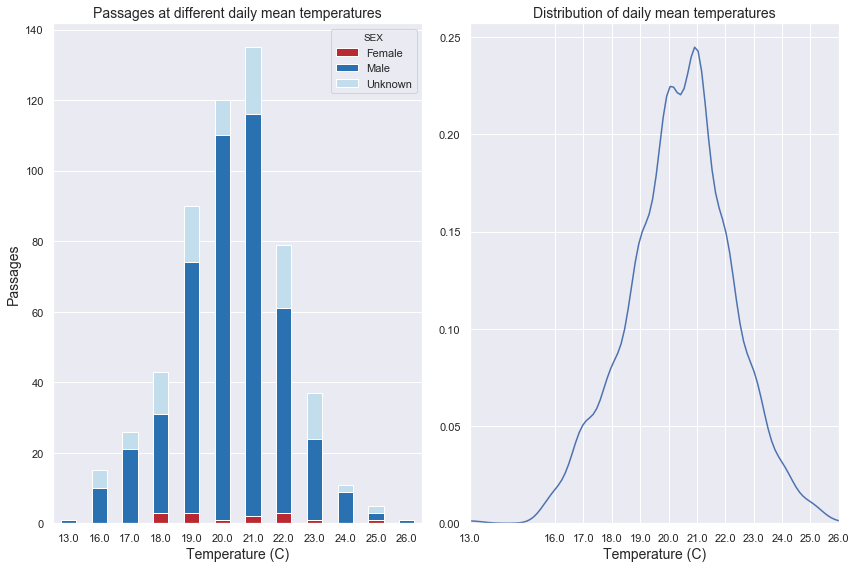

In [115]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
plt.xticks(rotation=0)
pivot_temp.loc[:,].plot.bar(stacked=True, 
                            color=[palette[-1], palette[0], palette[2]], 
                            ax=axes[0])
axes[0].set_xlabel('Temperature (C)', fontsize=14)
axes[0].set_ylabel('Passages', fontsize=14)
axes[0].set_title('Passages at different daily mean temperatures', fontsize=14)
axes[0].xaxis.grid(False)
axes[0].xaxis.set_tick_params(rotation=0)

sns.distplot(giwe['Temperature'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily mean temperatures', fontsize=14)
axes[1].set_xlabel('Temperature (C)', fontsize=14)
axes[1].set_xlim(13, 26)
_=axes[1].set_xticks(temp_group['Temperature'].unique())
_=axes[1].set_xticklabels(temp_group['Temperature'].unique())
axes[1].xaxis.grid(True, linestyle='-')
plt.tight_layout()

In [116]:
import math
def truncate(number, digits) -> float:
    stepper = pow(10.0, digits)
    return math.trunc(stepper * number) / stepper

In [117]:
giwe = giwe[giwe['Rain'].isna() == False]

In [118]:
giwe['Rain'] = giwe['Rain'].apply(lambda x: truncate(x, 1))

In [210]:
giwe['Rain'].unique()

array([1.8, 3.5, 2.2, 1.7, 0.5, 1. , 3.6, 3.1, 1.9, 1.2, 1.1, 1.5, 0.3,
       0.6, 2. , 2.5, 1.4, 0.9, 0.4, 0.8, 4.6, 4.3, 1.6])

In [119]:
tmp = giwe[['DATE', 'Rain', 'Passage W/O along', 'SEX']].dropna()

In [120]:
tmp.dtypes

DATE                 datetime64[ns]
Rain                        float64
Passage W/O along            object
SEX                          object
dtype: object

In [121]:
tmp['Passage W/O along'] = tmp['Passage W/O along'].astype(int)

In [122]:
gr = tmp.groupby(['DATE', 'SEX']).mean().reset_index()

In [123]:
gr['Rain'] = gr['Rain'].apply(lambda x: truncate(x, 1))

In [124]:
gr.Rain.unique()

array([1.8, 3.5, 2.2, 1.7, 0.5, 1. , 3.6, 3.1, 1.9, 1.2, 1.1, 1.5, 0.3,
       0.6, 2. , 2.5, 1.4, 1.3, 0.9, 0.4, 0.8, 4.6, 4.3, 1.6])

In [125]:
rain_group = gr.groupby(['Rain', 'SEX']).sum().reset_index()

### Vid vilken dygnsmedelnederbörd görs flest passager? Passage (AB) vs Rain (B)

Vet inte vilken av dessa som är tydligast.. kanske bäst med samma ticks på x-axeln för båda.

In [126]:
pivot_rain = rain_group.pivot(index='Rain', columns='SEX', values='Passage W/O along')

## Perason correlation mellan hur vanligt det är med en viss mängd regnfall och hur många passager som görs vid en viss mängd regnfall

In [217]:
x = tmp.groupby('Rain').sum()['Passage W/O along']

In [218]:
y = tmp.groupby('Rain').count()['DATE']

x = passager summerat över dagligt rainfall

y = antal dagar med en viss rainfall

Precis som med temperatur kollar vi efter ett linjärt samband mellan hur vanlig en temperatur är och hur många passager som görs för en viss regnfall.

In [234]:
coef, pval = pearsonr(x, y)
print('Pearson coefficient: {}\n\np-value: {}'.format(coef, pval))

Pearson coefficient: 0.9739470907588741

p-value: 5.171561883832083e-15


## Bästa plotten för det är nedan tycker jag

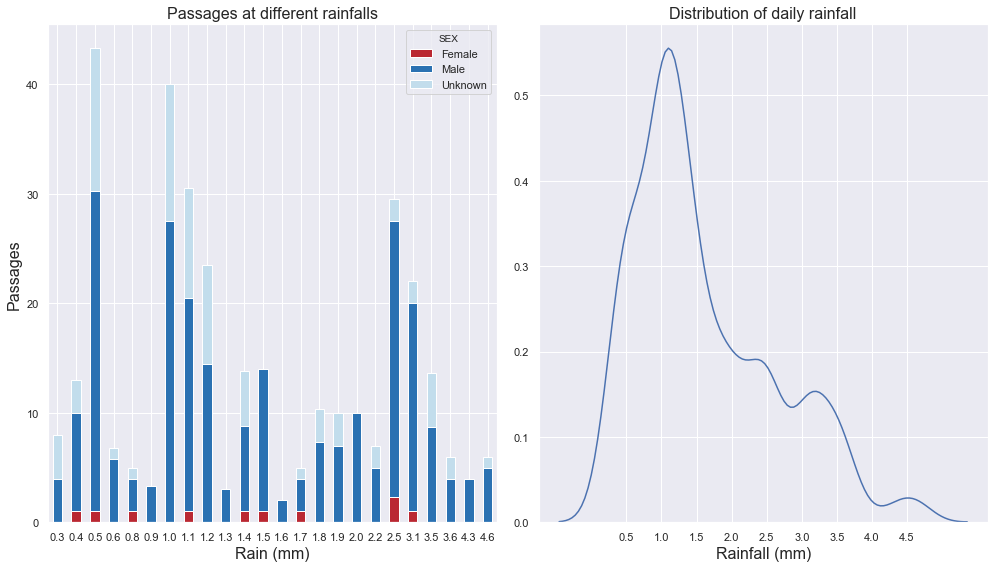

In [256]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))

#ax1 = fig.add_subplot(2,1,1)

pivot_rain.loc[:,].plot.bar(stacked=True, color=[palette[-1], palette[0], palette[2]], ax=ax1)
ax1.set_xlabel('Rain (mm)', fontsize=16)
ax1.set_ylabel('Passages', fontsize=16)
ax1.set_title('Passages at different rainfalls', fontsize=16)
#ax1.set_xticklabels(['{:.1f}'.format(x) for x in pivot_rain.index], rotation=0)
#ax1.xaxis.grid(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(0)
#ax2 = fig.add_subplot(2,1,2, sharex=ax1)

#sns.kdeplot(r['Rain'], ax=ax2)
#r.plot.bar(ax=ax2)
#giwe['Rain'].dropna().plot.kde(ax=ax2)
sns.distplot(giwe['Rain'].dropna(), hist=False, ax=ax2)
ax2.set_title('Distribution of daily rainfall', fontsize=16)
ax2.set_xlabel('Rainfall (mm)', fontsize=16)
ax2.set_xticks([(0.5*x) for x in range(1, 10)])

#ax2.set_xticklabels(rain_group['Rain'].unique())
#ax2.set_xticks(rain_group['Rain'].unique())
#ax2.xaxis.grid(True, linestyle='-')
#ax2.autoscale()

plt.tight_layout()

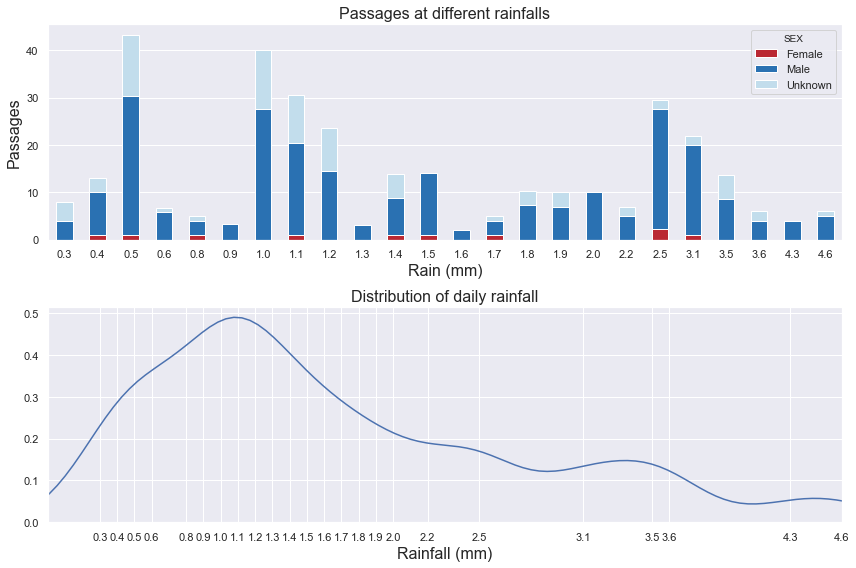

In [128]:
fig, axes = plt.subplots(2,1, figsize=(12,8))

pivot_rain.loc[:,].plot.bar(stacked=True, 
                            color=[palette[-1], palette[0], palette[2]], 
                            ax=axes[0])
axes[0].set_xlabel('Rain (mm)', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages at different rainfalls', fontsize=16)
axes[0].set_xticklabels(['{:.1f}'.format(x) for x in pivot_rain.index], rotation=0)
axes[0].xaxis.grid(False)

sns.distplot(giwe['Rain'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily rainfall', fontsize=16)
axes[1].set_xlabel('Rainfall (mm)', fontsize=16)
axes[1].set_xlim(0, 4.6)
axes[1].set_xticks(rain_group['Rain'].unique())
axes[1].xaxis.grid(True, linestyle='-')
plt.tight_layout()

### Under vilken regnperiod görs flest passager? Passage vs kolumn ”365Rain, rain7lo-hi, rain30lo-hi och rain90lo-hi” – finns i fliken Daily weather

In [131]:
giwe.columns

Index(['DATE', 'DATE.1', 'CORRIDOR', 'HOUR', 'SEX', 'DIRECTION', 'IN', 'OUT',
       'GROUP SIZE', 'Passage W/O along', 'Passage', 'COMMENT',
       'MOON LUMINOSITY', 'MEAN TEMP', 'PRESSURE', 'HUMIDITY', 'WIND SPEED',
       'CLOUD COVERAGE', 'DATE.2', 'Rain', 'Rain7', 'Rain30', 'Rain90',
       'Temperature', 'Temp7', 'Temp30', 'Temp90', 'Pressure ~', 'Humidity~',
       'Wind~', 'Cloud coverage~', 'Moon Luminosity~', 'Moon phase', '365Temp',
       '365CC', '365Rain', 'Temp7hi-lo', 'Temp30hi-lo', 'Temp90hi-lo',
       'Rain7hi-lo', 'Rain30hi-lo', 'Rain90hi-lo', 'Unnamed: 24', 'Sum IN',
       'Sum OUT', 'Sum INOUT'],
      dtype='object')

In [132]:
giwe['365Rain'].unique()

array([2., 3., 1.])

In [133]:
def get_rain_group(x):
    rain_period = giwe[[x, 'SEX', 'Passage W/O along']].copy()
    rain_period = rain_period.dropna()
    rain_period[x] = rain_period[x].astype(int)
    rain_period = rain_period.groupby([x, 'SEX']).sum().reset_index()
    return rain_period

In [134]:
rain_titles = {
    '365Rain': 'yearly', 
    'Rain7hi-lo': 'weekly', 
    'Rain30hi-lo': 'monthly', 
    'Rain90hi-lo': 'tri-monthly'
}
rain_map = {r: get_rain_group(r) for r in rain_titles.keys()}

In [135]:
rain_map['365Rain']

,365Rain,SEX,Passage W/O along
0,1,Female,4
1,1,Male,141
2,1,Unknown,40
3,2,Female,5
4,2,Male,162
5,2,Unknown,40
6,3,Female,5
7,3,Male,144
8,3,Unknown,22


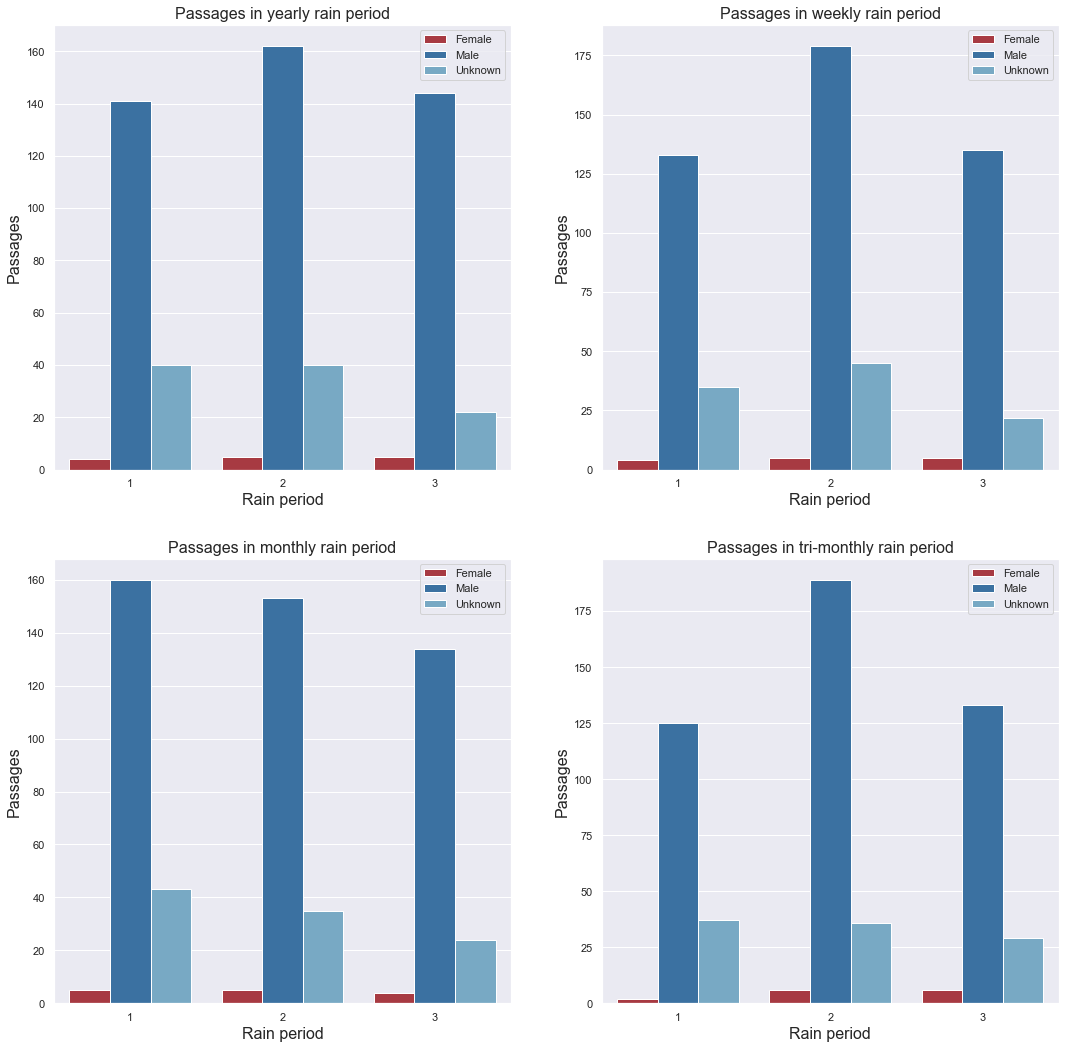

In [136]:
fig, axes = plt.subplots(2,2, figsize=(18,18))

for ax, (rain_name, rain_data) in zip(axes.flatten(), rain_map.items()):
    sns.barplot(x=rain_name, y='Passage W/O along', hue='SEX',
                data=rain_data, ax=ax, palette=[palette[-1], palette[0], palette[1]])
    ax.set_xlabel('Rain period', fontsize=16)
    ax.set_ylabel('Passages', fontsize=16)
    ax.legend(loc='upper right')
    ax.set_title(f'Passages in {rain_titles[rain_name]} rain period', fontsize=16)

In [137]:
giwe['Temperature'].unique()

array([23., 22., 21., 20., 19., 24., 25., 26., 18., 17., 16., 13.])

###	Av de passager som görs nattetid (mellan 19.00 och 6.00), hur många görs under respektive månfas? Dvs hur mycket påverkar nattljuset hur girafferna migrerar. Använder de korridorerna mer när det är fullmåne (kring månfas 5) eller nymåne (kring månfas 1,8).

In [138]:
moon = giwe[(giwe['HOUR'] <= 6.) | (giwe['HOUR'] >= 19.)]

In [139]:
moon['HOUR'].unique()

array([20.,  1., 22., 19.,  3., 21.,  5.,  6.,  4.,  0.,  2., 23.])

In [140]:
giwe['Moon phase'].unique()

array([6, 7, 8, 1, 2, 3, 4, 5])

In [141]:
moon['Passage W/O along'] = moon['Passage W/O along'].astype(int)

/home/max/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
moon['Passage W/O along'].unique()

array([1, 0])

In [143]:
moon_group = moon.groupby('Moon phase').sum()['Passage W/O along'].reset_index()

In [144]:
moon_group

,Moon phase,Passage W/O along
0,1,15
1,2,16
2,3,45
3,4,36
4,5,20
5,6,21
6,7,42
7,8,17


Text(0.5, 1.0, 'Passages between 19:00 and 06:00 summed over moon phase')

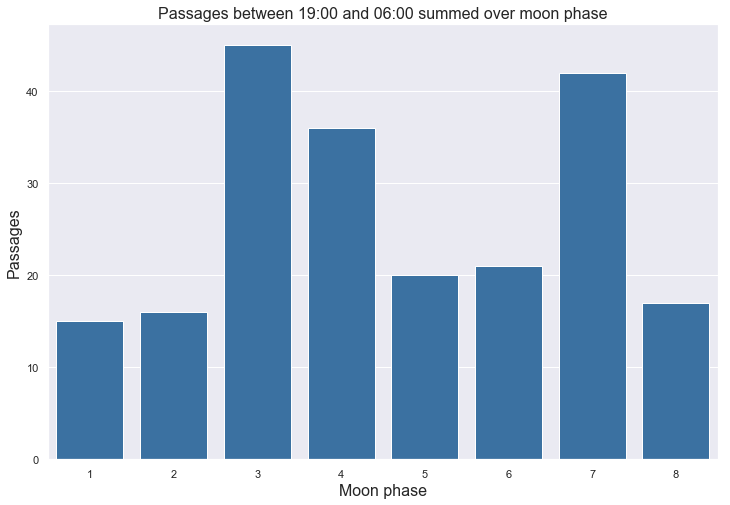

In [145]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.barplot(x='Moon phase', y='Passage W/O along',
            data=moon_group, ax=ax, palette=[palette[0]])
ax.set_xlabel('Moon phase', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages between 19:00 and 06:00 summed over moon phase', fontsize=16)

## Verkar inte finnas några female under dessa tiden? Bara unknown och Male.

In [146]:
moon_group2 = moon.groupby(['Moon phase', 'SEX']).sum()['Passage W/O along'].reset_index()

In [147]:
pivot_moon = moon_group2.pivot(index='Moon phase', columns='SEX', values='Passage W/O along')

/home/max/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


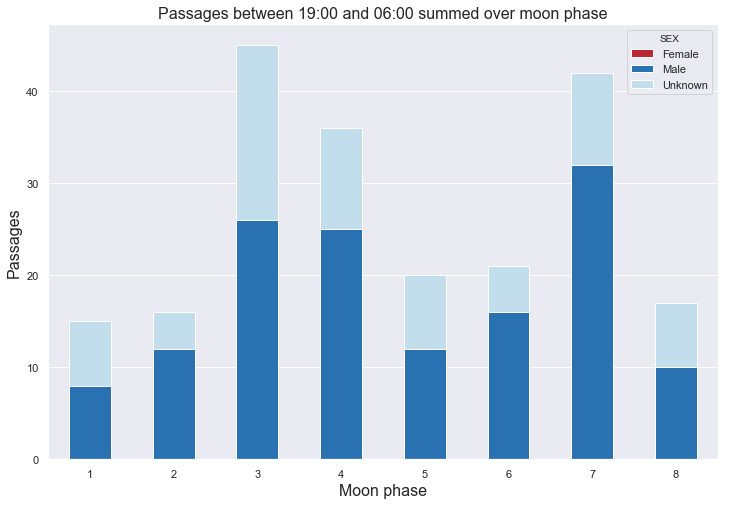

In [148]:
fig, ax = plt.subplots(1, figsize=(12,8))
pivot_moon.loc[:,].plot.bar(stacked=True, colors=[palette[-1], palette[0], palette[2]], ax=ax)
ax.set_xlabel('Moon phase', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages between 19:00 and 06:00 summed over moon phase', fontsize=16)
plt.xticks(rotation=0)
plt.grid(b=True, which='major', axis='x', linestyle='')
plt.grid(b=True, which='major', axis='y', linestyle='-')

Text(0.5, 1.0, 'Passages between 19:00 and 06:00 summed over moon phase')

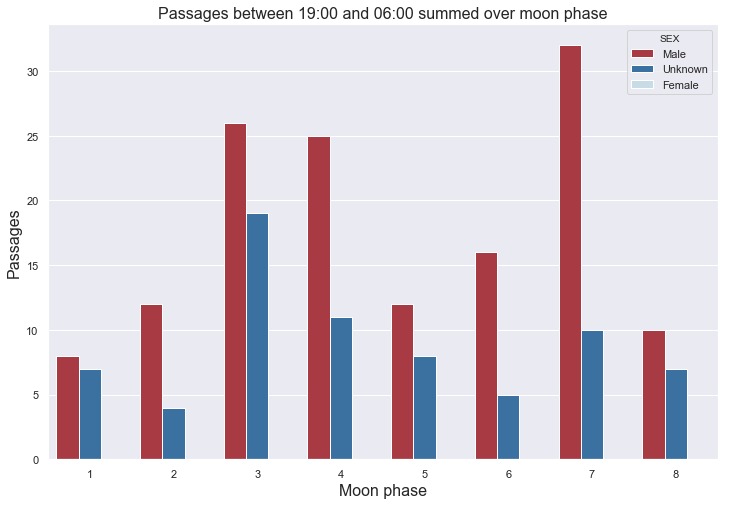

In [149]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.barplot(x='Moon phase', y='Passage W/O along', hue='SEX',
            data=moon_group2, ax=ax, palette=[palette[-1], palette[0], palette[2]])
ax.set_xlabel('Moon phase', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages between 19:00 and 06:00 summed over moon phase', fontsize=16)

### Tar vi och summerar över moon phase och sex i alla tider (inte bara mellan 19-06) får vi lite females också..

In [150]:
giwe[['Moon phase', 'SEX', 'Passage W/O along']].groupby(['Moon phase', 'SEX']).sum()

Passage W/O along
Moon phase SEX                       
1          Female                   3
           Male                    50
           Unknown                 15
2          Female                   1
           Male                    55
           Unknown                  4
3          Female                   4
           Male                    65
           Unknown                 23
4          Female                   1
           Male                    69
           Unknown                 16
5          Female                   1
           Male                    40
           Unknown                 10
6          Female                   1
           Male                    47
           Unknown                 12
7          Female                   2
           Male                    68
           Unknown                 12
8          Female                   1
           Male                    53
           Unknown                 10

In [151]:
giwe = giwe[giwe['Passage W/O along'].isna() == False]

In [152]:
giwe = giwe[giwe['CORRIDOR'].isna() == False]

## Passager i korridor 1+2 före och efter 2017-04-25

In [153]:
after = giwe[giwe.DATE >= '2017-04-25']
before = giwe[giwe.DATE < '2017-04-25']

In [154]:
after.DATE.count()

355

In [155]:
before.DATE.count()

357

Nästan lika många dagar i båda, det är ju nice.

In [156]:
after_ = after[after.CORRIDOR != 3]
before_ = before[before.CORRIDOR != 3]

In [157]:
from scipy.stats import ttest_ind

res = ttest_ind(after_['Passage W/O along'], before_['Passage W/O along'], equal_var=True)
print('T-test results.\nstats: {}\np-val: {}'.format(res.statistic, res.pvalue))

T-test results.
stats: -1.7911728675821759
p-val: 0.07370501075340234


P värde större än 0.05, dvs du kan inte förkasta nollhypotesen att populationerna är identiska om du kör med vanliga 5% gränsen. 

In [158]:
after = after[['CORRIDOR', 'Passage W/O along']]

In [159]:
before = before[['CORRIDOR', 'Passage W/O along']]

In [160]:
after.groupby('CORRIDOR').sum()

,Passage W/O along
CORRIDOR,
1.0,28
2.0,238
3.0,0


In [161]:
before.groupby('CORRIDOR').sum()

,Passage W/O along
CORRIDOR,
1.0,1
2.0,290
3.0,6


inte speciellt mycket action i korridor 3..